In [1]:
import numpy as np
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False 

import jieba
import jieba.analyse as anls
from snownlp import SnowNLP
from wordcloud import WordCloud

In [2]:
comment = pd.read_csv('douwei.csv', dtype={'content' : str})

E:\IDE\Anaconda3\envs\iSpider\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


E:\IDE\Anaconda3\envs\iSpider\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


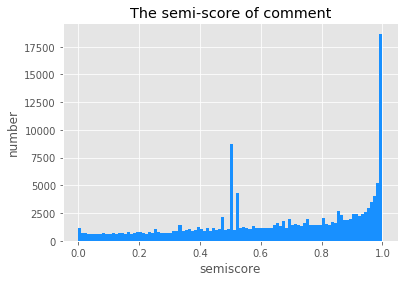

In [3]:
plt.hist(comment['semiscore'], bins=np.arange(0, 1.01, 0.01), label='semisocre', color='#1890FF')
plt.xlabel("semiscore")
plt.ylabel("number")
plt.title("The semi-score of comment")
plt.show()

In [4]:
semilabel = comment['semilabel'].value_counts()
semilabel = semilabel.loc[[1, -1]]

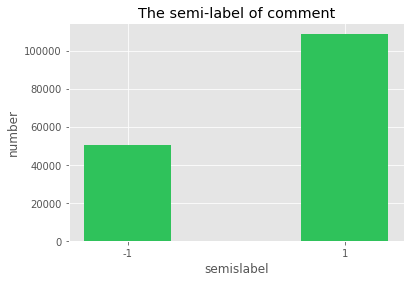

In [5]:
plt.bar(semilabel.index, semilabel.values, tick_label=semilabel.index, color='#2FC25B')
plt.xlabel("semislabel")
plt.ylabel("number")
plt.title("The semi-label of comment")
plt.show()

In [6]:
comment_list = comment['content'].tolist()

In [7]:
text = ''.join(str(s) for s in comment['content'] if s not in [None])

In [8]:
word_list = jieba.cut(text, cut_all=False)

In [9]:
stopwords = [line.strip() for line in open('stopwords.txt',encoding='UTF-8').readlines()]

In [10]:
clean_list = []
for seg in word_list:
    if seg not in stopwords:
        clean_list.append(seg)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\gaiusyao\AppData\Local\Temp\jieba.cache
Loading model cost 1.138 seconds.
Prefix dict has been built succesfully.


In [11]:
clean_text = ''.join(clean_list)

In [12]:
cloud = WordCloud(  
    font_path = 'F:\fonts\FZBYSK.TTF',   
    background_color = 'white',  
    max_words = 1000,  
    max_font_size = 64       
) 
word_cloud = cloud.generate(clean_text) 

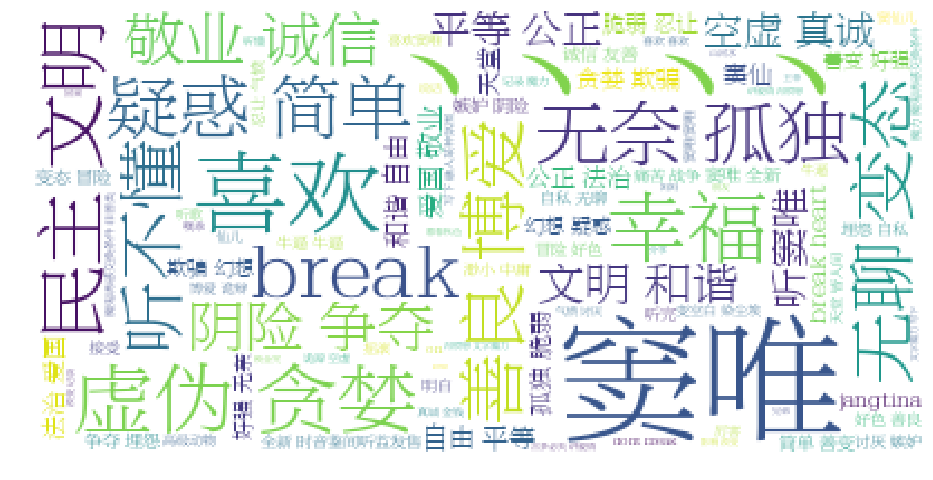

In [13]:
plt.figure(figsize=(16, 16))
plt.imshow(word_cloud)  
plt.axis('off')  
plt.show()

In [14]:
for x, w in anls.extract_tags(clean_text, topK=30, withWeight=True):
    print('{0}: {1}'.format(x, w))

窦唯: 0.15724718035981347
喜欢: 0.07023381092017361
摇滚: 0.060910414260493734
仙儿: 0.04719665012802413
王菲: 0.04180902654077683
窦仙: 0.026410327574023038
听歌: 0.025442998710579263
听不懂: 0.01915624082916256
成仙: 0.01446956996018827
幸福: 0.014463875532291967
汪峰: 0.013827908250082704
大仙: 0.013416340412472692
高级: 0.012946545767003765
前奏: 0.012583008563164954
黑豹: 0.01227604905792626
艳阳天: 0.012192842883407568
动物: 0.01213492379855029
吉他: 0.011186100019382517
听懂: 0.011175208514603784
歌曲: 0.011132865347324022
忘词: 0.011057508513567876
黑梦: 0.010978057799082829
希望: 0.010666977875512112
理解: 0.010326305102508124
厉害: 0.010202440009141578
窦唯是: 0.009808264754918266
听听: 0.009629808466537578
哀伤: 0.009400119404130316
窦靖童: 0.00920753106036126
窦唯歌: 0.009178376192675808
